In [1]:
import json
from matplotlib import pyplot as plt
from pandas import DataFrame
from pathlib import Path
from typing import Tuple

In [2]:
PROJECT_DIR = Path("/home/yutanagano/Projects/tcr_embedder/")
BENCHMARKS_DIR = PROJECT_DIR/"benchmarks"

def load_stats(model_name: str, task_name: str) -> Tuple[DataFrame]:
    stats_dir = BENCHMARKS_DIR/model_name/task_name
    with open(stats_dir/"results.json", "r") as f:
        stats_dict = json.load(f)
    
    return DataFrame(stats_dict["nn_classification"]).T, DataFrame(stats_dict["svc_classification"]).T

In [3]:
sceptr_stats = load_stats("AB_SCEPTR", "one_vs_rest")
sceptr_finetuned_stats = load_stats("AB_SCEPTR_finetuned", "one_vs_rest")

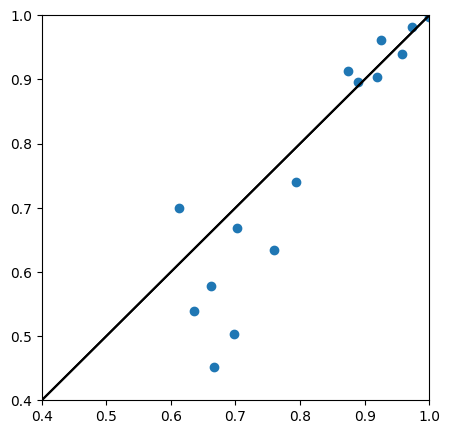

In [4]:
plt.figure(figsize=(5,5))

plt.plot([[0,0],[1,1]], color="k")
plt.scatter(sceptr_stats[0]["auc"], sceptr_finetuned_stats[0]["auc"])
plt.xlim(0.4,1)
plt.ylim(0.4,1)

plt.show()

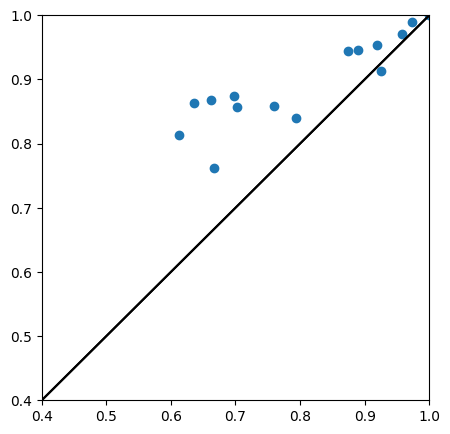

In [55]:
plt.figure(figsize=(5,5))

plt.plot([[0,0],[1,1]], color="k")
plt.scatter(sceptr_stats[0]["auc"], sceptr_stats[1]["auc"])
plt.xlim(0.4,1)
plt.ylim(0.4,1)

plt.show()

In [56]:
bg_stats = load_stats("AB_SCEPTR", "one_vs_background")
rest_stats = load_stats("AB_SCEPTR", "one_vs_rest")

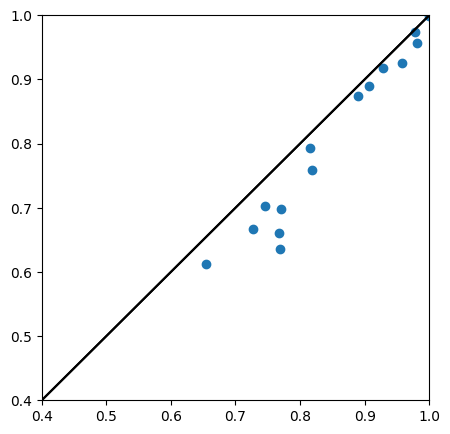

In [58]:
plt.figure(figsize=(5,5))

plt.plot([[0,0],[1,1]], color="k")
plt.scatter(bg_stats[0]["auc"], rest_stats[0]["auc"])
plt.xlim(0.4,1)
plt.ylim(0.4,1)

plt.show()